In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 1. Importing data and splitting to input and output features

In [2]:
df = pd.read_csv('HIV1-inhibitor_pIC50_pubchem_fp.csv')

In [3]:
#input
x = df.drop('pIC50', axis = 1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7440,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7441,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7442,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#output
y = df['pIC50']
y

0       5.045757
1       5.853872
2       6.000000
3       5.769551
4       6.000000
          ...   
7439    5.408935
7440    5.677781
7441    4.823909
7442    5.154902
7443    5.004365
Name: pIC50, Length: 7444, dtype: float64

In [5]:
x.shape, y.shape

((7444, 881), (7444,))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)

## 2. Building Model

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state = 2021)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.4048147318908253

In [8]:
y_pred = model.predict(x_test)

C:\Users\jeta7\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

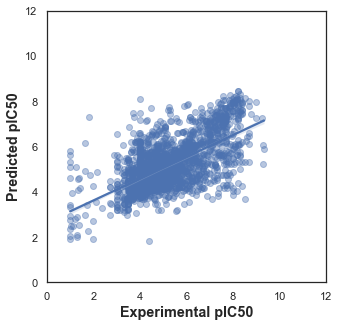

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## 3. Calculating theoretical molecule fingerprint

In [10]:
weights = pd.DataFrame(model.feature_importances_)
weights = weights.rename(columns = {0: 'feature_weights'})
weights.describe()

,feature_weights
count,881.000000
mean,0.001135
std,0.004919
min,0.000000
25%,0.000000
50%,0.000274
75%,0.001067
max,0.133144


In [11]:
import numpy as np
percentile_90 = np.percentile(weights, 90)
percentile_90

0.0031027073943197584

In [12]:
predicted_fp_90 = []

for i in weights['feature_weights']:
    if i >= percentile_90:
        predicted_fp_90.append(1)
    else:
        predicted_fp_90.append(0)

In [13]:
col = df.columns[:-1]
col

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

In [14]:
df_pred = pd.DataFrame(predicted_fp_90).transpose()
df_pred.columns = col
df_pred.to_csv("predicted_molecule_90_fp.csv")

## 4. Finding molecules with similar fingerprints

In [15]:
mapping = dict(zip(col, predicted_fp_90))

fp1 = []

for i in mapping.keys():
    if mapping[i] == 1:
        fp1.append(i)

In [16]:
df2 = pd.read_csv('descriptors_output.csv')
df2.index = df2['Name']

In [17]:
df_fp1 = df2[fp1]
df_fp1

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP143,...,PubchemFP703,PubchemFP705,PubchemFP706,PubchemFP707,PubchemFP712,PubchemFP734,PubchemFP738,PubchemFP797,PubchemFP801,PubchemFP803
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL143614,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL143614,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL67076,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
CHEMBL67076,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
CHEMBL144118,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4649461,1,1,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
CHEMBL4647024,1,1,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
CHEMBL4644631,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
score = pd.DataFrame(df_fp1.sum(axis=1), columns = ['score'])
score

,score
Name,
CHEMBL143614,13
CHEMBL143614,13
CHEMBL67076,18
CHEMBL67076,18
CHEMBL144118,17
...,...
CHEMBL4649461,30
CHEMBL4647024,30
CHEMBL4644631,28


In [19]:
df_final = pd.concat([df2,score], axis=1)

In [20]:
df_final = df_final.sort_values(by = 'score', ascending = False)

In [21]:
#highest matching
df_final['score'].head(10)

Name
CHEMBL2011884    72
CHEMBL2012380    68
CHEMBL2012381    68
CHEMBL2011785    68
CHEMBL2012379    68
CHEMBL2012007    68
CHEMBL2011886    68
CHEMBL2011883    67
CHEMBL2012128    66
CHEMBL2011881    66
Name: score, dtype: int64

In [22]:
#maximum possible score
len(fp1)

89

In [23]:
df_final.to_csv("molecule_fp90_scores.csv")

## 5. Comparing experimental pIC50 and predicted pIC50

### Predicted pIC50 of top 10

In [52]:
top10 = df_final.iloc[:10].drop(columns=['Name', 'score'])

In [53]:
names_10 = df_final.iloc[:10].index

In [54]:
predicted_top10 = model.predict(top10)
pd.DataFrame(predicted_top10, index = names_10, columns = ['Predicted pIC50'])

,Predicted pIC50
Name,
CHEMBL2011884,6.773992
CHEMBL2012380,4.213770
CHEMBL2012381,3.237978
CHEMBL2011785,6.948792
CHEMBL2012379,6.548863
CHEMBL2012007,6.948792
CHEMBL2011886,6.948792
CHEMBL2011883,7.255240
CHEMBL2012128,7.652144


### Experimental pIC50 of top 10

In [55]:
df3 = pd.read_csv('HIV1-inhibitor_bioactivity_data.csv')

In [56]:
df3.index = df3['molecule_chembl_id']

In [57]:
experimental_top10 = df3.loc[names_10]['pIC50']
pd.DataFrame(experimental_top10)

,pIC50
molecule_chembl_id,
CHEMBL2011884,6.508638
CHEMBL2012380,7.721246
CHEMBL2012381,7.698970
CHEMBL2011785,6.494850
CHEMBL2012379,7.283997
CHEMBL2012007,7.638272
CHEMBL2011886,7.698970
CHEMBL2011883,6.537602
CHEMBL2012128,6.602060


Among the top 10 molecules determined by the machine learning algorithm, all of the top 10 had experimental pIC50 values in the active drug class. However, the prediction by the algorithm showed 2 of the molecules being in the intermediate to inactive bioactivity class.

### Top 1000 Molecules

In [98]:
top1000 = df_final.iloc[:1000].drop(columns=['Name', 'score'])
names_1000 = df_final.iloc[:1000].index

In [99]:
predicted_top1000 = model.predict(top1000)

In [100]:
df4 = df3.drop_duplicates(subset=['molecule_chembl_id'])
experimental_top1000 = df4.loc[names_1000]['pIC50']

C:\Users\jeta7\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

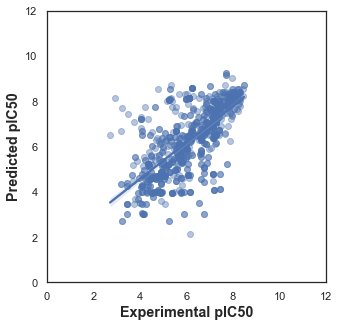

In [101]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(list(predicted_top1000), list(experimental_top1000), scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [102]:
r2 = model.score(top1000, list(experimental_top1000))
r2

0.43530594357246133